In [31]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.datasets import make_blobs # type: ignore

1. Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


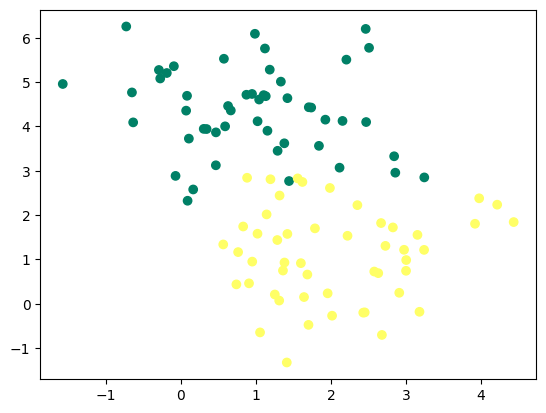

In [32]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.show()

2. Model function

In [33]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.rand(1)
    return (W, b)

In [34]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [35]:
def log_loss(A, y):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [36]:
def gradients(A, X, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [37]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [38]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [39]:
from sklearn.metrics import accuracy_score

In [ ]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation of W and b
    W, b = initialisation(X)

    Loss = []

    # training for W and b
    for i in range (n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

[[0.93788689]
 [0.82972513]
 [0.00860707]
 [0.2155663 ]
 [0.94987205]
 [0.37454945]
 [0.08085497]
 [0.91093227]
 [0.06234921]
 [0.89960922]
 [0.03952798]
 [0.89052203]
 [0.02687986]
 [0.02655059]
 [0.73443673]
 [0.96658127]
 [0.9885525 ]
 [0.05137949]
 [0.81017674]
 [0.69830985]
 [0.04903858]
 [0.04551706]
 [0.43446903]
 [0.00814094]
 [0.94602344]
 [0.03748487]
 [0.91703227]
 [0.00911669]
 [0.06651799]
 [0.72355268]
 [0.97748618]
 [0.04911754]
 [0.74498442]
 [0.97773512]
 [0.42043725]
 [0.20305061]
 [0.81782995]
 [0.54470205]
 [0.44637667]
 [0.56698951]
 [0.11145609]
 [0.05255729]
 [0.00150395]
 [0.17762584]
 [0.24502191]
 [0.83439843]
 [0.9693832 ]
 [0.96741121]
 [0.00858862]
 [0.01160591]
 [0.94428933]
 [0.65735325]
 [0.03183509]
 [0.04130461]
 [0.75050217]
 [0.04660843]
 [0.64918295]
 [0.84875106]
 [0.93625759]
 [0.98977719]
 [0.69241027]
 [0.16577898]
 [0.00749063]
 [0.91308573]
 [0.01494456]
 [0.38439315]
 [0.05436516]
 [0.54563113]
 [0.92249607]
 [0.26292949]
 [0.19370609]
 [0.93

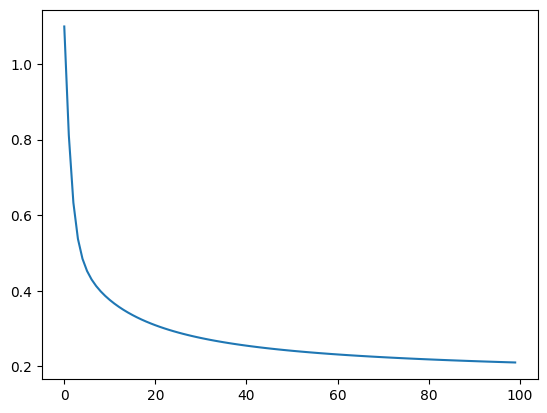

In [41]:
W, b = artificial_neuron(X, y)

3. Prediction and decision frontier

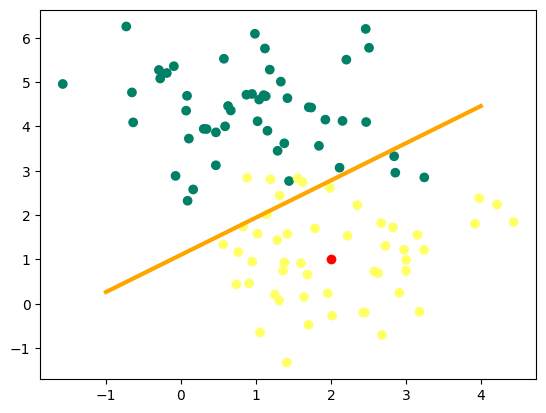

[0.88160864]


array([ True])

In [46]:
# Point to classify
new_plant = np.array([2, 1])

# Decision frontier
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer') # Display the points
plt.scatter(new_plant[0], new_plant[1], c='r') # Display the point to be sorted
plt.plot(x0, x1, c='orange', lw=3) # Plot the border
plt.show()

predict(new_plant, W, b) # Calculate the probability that it belongs to the yellow class

4. 3D printing

In [43]:
import plotly.graph_objects as go

In [44]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [ ]:
# decision surface plot
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()